## import libraries

In [1]:
from compas_vol.primitives import VolSphere, VolBox
from compas_vol.combinations import Union
from compas.geometry import Box, Frame, Point, Sphere

In [2]:
import numpy as np
import meshplot as mp
from skimage.measure import marching_cubes
from compas_vol.utilities import bbox_edges

## create volumetric object (CSG tree)

In [3]:
s = Sphere(Point(15, 20, 0), 5)
b = Box(Frame.worldXY(), 20, 15, 10)
vs = VolSphere(s)
vb = VolBox(b, 2.5)
u = Union(vs, vb)

In [4]:
from compas_vol.combinations import Addition, Multiplication, Division
from compas_vol.modifications import Factor

In [8]:
import matplotlib.pyplot as plt

In [5]:
field = Division(Addition(vs, Factor(vb,-1)), (Addition(vs, vb)))

## workspace (dense grid)

In [20]:
#workspace initialization
# lower and upper bounds
lbx, ubx = -30.0, 30.0
lby, uby = -30.0, 30.0
lbz, ubz = -30.0, 30.0
# resolution(s)
nx, ny, nz = 200, 200, 200
x, y, z = np.ogrid[lbx:ubx:nx*1j, lby:uby:ny*1j, lbz:ubz:nz*1j]
#voxel dimensions
gx = (ubx-lbx)/nx
gy = (uby-lby)/ny
gz = (ubz-lbz)/nz

## sample at discrete interval

In [21]:
dm = field.get_distance_numpy(x, y, z)

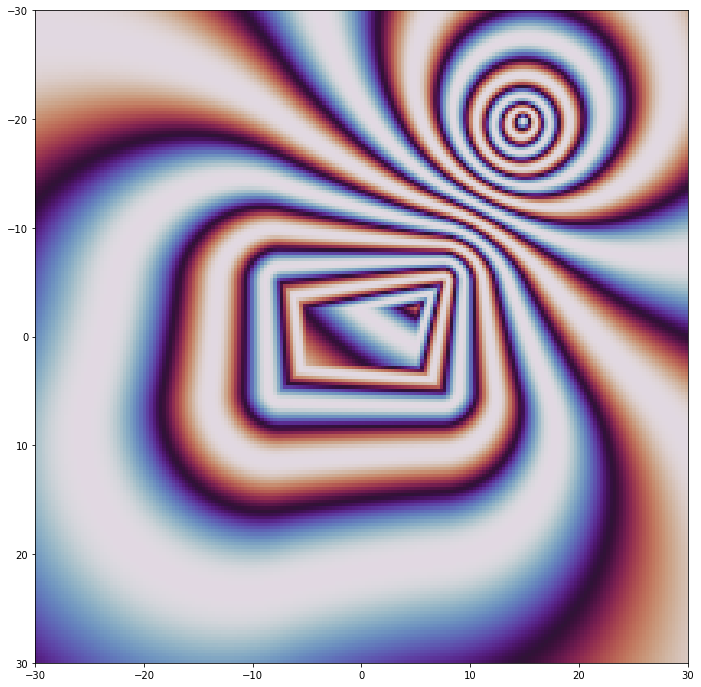

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(np.sin(np.flip(dm[:,:,100].T*10, axis=0)), extent=[lbx,ubx,uby,lby], cmap='twilight')

## generate isosurface (marching cube)

In [6]:
v, f, n, l = marching_cubes(dm, 0, spacing=(gx, gy, gz))
v += [lbx,lby,lbz]

## display mesh

In [7]:
p = mp.plot(v, f, c=np.array([0,0.57,0.82]), shading={"flat":False, "roughness":0.4, "metalness":0.01, "reflectivity":1.0})
vs,ve = bbox_edges(lbx,ubx,lby,uby,lbz,ubz)
p.add_lines(np.array(vs), np.array(ve))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(31.675851…